# Defining the molecule space

In [6]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw
from IPython.display import display


In [ ]:

smiles_to_name = {
    'C': 'Methane',
    'CC': 'Ethane',
    'CCC': 'Propane',
    'CCCC': 'Butane',
    'CC(C)C': 'Isobutane',  # 2-methylpropane
    'CCCCC': 'Pentane',
    'CC(C)CC': 'Isopentane',  # 2-methylbutane
    'CC(C)(C)C': 'Neopentane',  # 2,2-dimethylpropane
    'CCCCCC': 'Hexane',
    'CC(C)CCC': '2-Methylpentane',
    'CC(C)C(C)C': '2,3-Dimethylbutane',
    'CCCCCCC': 'Heptane',
    
    # Alkenes

    
    
    # Alkines

    # Alcohols (-OH)
    'CO': 'Methanol',
    'CCO': 'Ethanol',
    'CCCO': '1-Propanol',
    'CC(O)C': '2-Propanol',  # Isopropanol (renamed for consistency)
    'CCCCO': '1-Butanol',
    'CC(O)CC': '2-Butanol',
    'CC(C)CO': 'Isobutanol',  # 2-methyl-1-propanol
    'CC(C)(C)O': 'tert-Butanol',
    'CCCCCO': '1-Pentanol',
    'CCCC(O)C': '2-Pentanol',
    'CCCCCCO': '1-Hexanol',
    'CCCCCCCO': '1-Heptanol',
    
    # Aldehydes (-CHO)
    'C=O': 'Formaldehyde',
    'CC=O': 'Acetaldehyde',
    'CCC=O': 'Propanal',
    'CCCC=O': 'Butanal',
    'CCCCC=O': 'Pentanal',
    'CCCCCC=O': 'Hexanal',
    'CCCCCCC=O': 'Heptanal',
    
    # Ketones (R-C(=O)-R')
    'CC(C)=O': 'Acetone',
    'CCC(=O)C': '2-Butanone',
    'CCCC(C)=O': '2-Pentanone',
    'CCC(=O)CC': '3-Pentanone',

    # Carboxylic Acids (-COOH)
    'O=CO': 'Formic acid',
    'CC(=O)O': 'Acetic acid',
    'CCC(=O)O': 'Propionic acid',
    'CCCC(=O)O': 'Butyric acid',
    'CCCCC(=O)O': 'Valeric acid',
    'CCCCCC(=O)O': 'Hexanoic acid',
    'CCCCCCC(=O)O': 'Heptanoic acid',

    # Ethers (R-O-R')
    'COC': 'Dimethyl ether',
    'COCC': 'Ethyl methyl ether',
    'CCOCC': 'Diethyl ether',

    # Esters (R-C(=O)O-R')
    'COC=O': 'Methyl formate',
    'CCOC=O': 'Ethyl formate',
    'CC(=O)OC': 'Methyl acetate',
    'CC(=O)OCC': 'Ethyl acetate',
    'CCC(=O)OC': 'Methyl propanoate',

    # Halogenated Hydrocarbons
    'CCl': 'Chloromethane',
    'C(Cl)Cl': 'Dichloromethane',
    'C(Cl)(Cl)Cl': 'Chloroform',
    'C(Cl)(Cl)(Cl)Cl': 'Carbon tetrachloride',
    'CCCl': 'Chloroethane',
    'CCCCl': '1-Chloropropane',
    'CC(Cl)C': '2-Chloropropane',
}

molecule_smiles = [s for s in smiles_to_name.keys()]

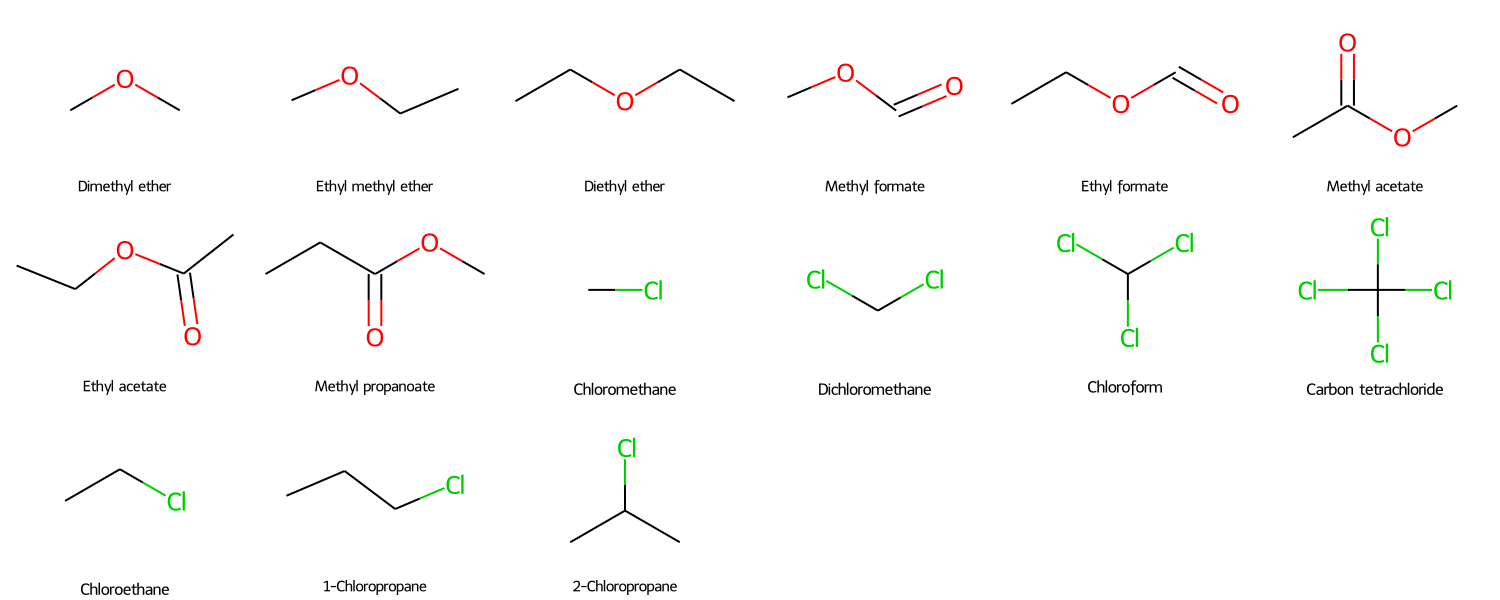

In [ ]:
# Prepare list of (Mol, name) tuples
mols = []
names = []
for smi, name in smiles_to_name.items():
    mol = Chem.MolFromSmiles(smi)
    if mol is not None:
        mols.append(mol)
        names.append(name)
    else:
        print(f"Invalid SMILES: {smi} ({name})")

# Draw molecules in a grid with names as legends
img = Draw.MolsToGridImage(mols, legends=names, molsPerRow=6, subImgSize=(250, 200))


display(img)
# Checked all SMILES by hand, checked all naming and structures, all valid and correct
# order and selection to be checked